In [ ]:
import os
import shutil
import tempfile
import pandas as pd
import time
import nibabel as nib
import torch.nn.functional as F


import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import monai
from monai.utils import set_determinism, first
from monai.transforms import *

from monai.config import print_config
from monai.losses import DiceCELoss
from monai.metrics import DiceMetric

from monai.data import (
    DataLoader,
    Dataset,
    CacheDataset,
    load_decathlon_datalist,
    decollate_batch,
)

from skimage import measure
from sklearn.metrics import roc_auc_score

import torch
import glob
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms,datasets
print_config()

In [96]:
data_Root = os.path.normpath('/home/oem/hufsbaby/ycm/qsm/dataset')
logdir_path = os.path.normpath('log_test20220830_seg')
if os.path.exists(logdir_path)==False:
    os.mkdir(logdir_path)

In [97]:
path = "/home/oem/hufsbaby/ycm/qsm/dataset"

In [98]:
train_list = [191, 190, 189, 188, 186,184, 182]
valid_list = [175, 172, 169, 167, 165 ]
# test_list = [44,46,47,48,49]

input_list = train_list + valid_list
print(input_list)

[191, 190, 189, 188, 186, 184, 182, 175, 172, 169, 167, 165]


In [99]:
train_data = [
    {
        "hpf": os.path.join(data_Root,str(idx)+'/'+
                                    "SWI_P.nii.gz"),    
        "raw": os.path.join(data_Root,str(idx)+'/'+
                                    "SWI_P_raw.nii.gz"),            
    }
    for idx in train_list
]

val_data = [
    {
        "hpf": os.path.join(data_Root,str(idx)+'/'+
                                    "SWI_P.nii.gz"),
        "raw": os.path.join(data_Root,str(idx)+'/'+
                                    "SWI_P_raw.nii.gz"),            
    }
    for idx in valid_list
]

In [100]:
d1 = nib.load(data_Root+'/172/SWI_P_raw.nii.gz').get_fdata()
d1.shape

(256, 256, 72, 4)

In [101]:
input_data = d1 

reshaped_data = input_data[:, :, :, 0] 
reshaped_data = reshaped_data[:, :, :, np.newaxis]

reshaped_data = reshaped_data / 255.0

print(reshaped_data.shape) 

three_dimensional_data = reshaped_data.squeeze(axis=-1)

print(three_dimensional_data.shape)


(256, 256, 72, 1)
(256, 256, 72)


In [104]:
for i in train_list:
    d1 = nib.load(os.path.join(data_Root, str(i), 'SWI_P.nii.gz')).get_fdata()
    d2 = nib.load(os.path.join(data_Root, str(i), 'SWI_M.nii.gz')).get_fdata()
    input_data = d1
    input_data2 = d2
    
    reshaped_data = input_data[:, :, :, 0] 
    reshaped_data = reshaped_data[:, :, :, np.newaxis]
#     reshaped_data = reshaped_data / 255.0
    
    reshaped_data2 = input_data2[:, :, :, 0]
    reshaped_data2 = reshaped_data2[:, :, :, np.newaxis]
    
    reshaped_data = reshaped_data * reshaped_data2
    reshaped_data = reshaped_data / 255.0
    
    three_dimensional_data = reshaped_data.squeeze(axis=-1)
    print(three_dimensional_data.shape)
    
#     output_filename = os.path.join(data_Root, str(i), 'Output_P.nii.gz')
#     nifti_image = nib.Nifti1Image(three_dimensional_data, affine=np.eye(4))
#     nib.save(nifti_image, output_filename)


(256, 256, 72)
(256, 256, 72)
(256, 256, 72)
(256, 256, 72)
(256, 256, 72)
(256, 256, 72)
(256, 256, 72)


In [54]:
for i in train_list:
    d1 = nib.load(os.path.join(data_Root, str(i), 'SWI_P_raw.nii.gz')).get_fdata()
    input_data = d1 
    reshaped_data = input_data[:, :, :, 0] 
    reshaped_data = reshaped_data[:, :, :, np.newaxis]
    
    reshaped_data = reshaped_data / 255.0
    
    three_dimensional_data = reshaped_data.squeeze(axis=-1)
    output_filename = os.path.join(data_Root, str(i), 'Output_P_raw.nii.gz')
    nifti_image = nib.Nifti1Image(three_dimensional_data, affine=np.eye(4))
    nib.save(nifti_image, output_filename)

In [55]:
for i in valid_list:
    d1 = nib.load(os.path.join(data_Root, str(i), 'SWI_P.nii.gz')).get_fdata()
    input_data = d1 
    reshaped_data = input_data[:, :, :, 0] 
    reshaped_data = reshaped_data[:, :, :, np.newaxis]
    
    reshaped_data = reshaped_data / 255.0
    
    three_dimensional_data = reshaped_data.squeeze(axis=-1)
    output_filename = os.path.join(data_Root, str(i), 'Output_P.nii.gz')
    nifti_image = nib.Nifti1Image(three_dimensional_data, affine=np.eye(4))
    nib.save(nifti_image, output_filename)


In [56]:
for i in valid_list:
    d1 = nib.load(os.path.join(data_Root, str(i), 'SWI_P_raw.nii.gz')).get_fdata()
    input_data = d1 
    reshaped_data = input_data[:, :, :, 0] 
    reshaped_data = reshaped_data[:, :, :, np.newaxis]
    
    reshaped_data = reshaped_data / 255.0
    
    three_dimensional_data = reshaped_data.squeeze(axis=-1)
    output_filename = os.path.join(data_Root, str(i), 'Output_P_raw.nii.gz')
    nifti_image = nib.Nifti1Image(three_dimensional_data, affine=np.eye(4))
    nib.save(nifti_image, output_filename)

In [57]:
train_data = [
    {
        "hpf": os.path.join(data_Root, str(idx), 'Output_P.nii.gz'),
        "raw": os.path.join(data_Root, str(idx), 'Output_P_raw.nii.gz')
    }
    for idx in train_list
]

val_data = [
    {
        "hpf": os.path.join(data_Root, str(idx), 'Output_P.nii.gz'),
        "raw": os.path.join(data_Root, str(idx), 'Output_P_raw.nii.gz')
    }
    for idx in valid_list
]

In [58]:
output_filename = 'output_data.nii.gz'

nifti_image = nib.Nifti1Image(three_dimensional_data, affine=np.eye(4))
nib.save(nifti_image, output_filename)

print('Data saved to', output_filename)

Data saved to output_data.nii.gz


In [59]:
print(len(train_data),len(val_data))
train_data, val_data

7 5


([{'hpf': '/home/oem/hufsbaby/ycm/qsm/dataset/191/Output_P.nii.gz',
   'raw': '/home/oem/hufsbaby/ycm/qsm/dataset/191/Output_P_raw.nii.gz'},
  {'hpf': '/home/oem/hufsbaby/ycm/qsm/dataset/190/Output_P.nii.gz',
   'raw': '/home/oem/hufsbaby/ycm/qsm/dataset/190/Output_P_raw.nii.gz'},
  {'hpf': '/home/oem/hufsbaby/ycm/qsm/dataset/189/Output_P.nii.gz',
   'raw': '/home/oem/hufsbaby/ycm/qsm/dataset/189/Output_P_raw.nii.gz'},
  {'hpf': '/home/oem/hufsbaby/ycm/qsm/dataset/188/Output_P.nii.gz',
   'raw': '/home/oem/hufsbaby/ycm/qsm/dataset/188/Output_P_raw.nii.gz'},
  {'hpf': '/home/oem/hufsbaby/ycm/qsm/dataset/186/Output_P.nii.gz',
   'raw': '/home/oem/hufsbaby/ycm/qsm/dataset/186/Output_P_raw.nii.gz'},
  {'hpf': '/home/oem/hufsbaby/ycm/qsm/dataset/184/Output_P.nii.gz',
   'raw': '/home/oem/hufsbaby/ycm/qsm/dataset/184/Output_P_raw.nii.gz'},
  {'hpf': '/home/oem/hufsbaby/ycm/qsm/dataset/182/Output_P.nii.gz',
   'raw': '/home/oem/hufsbaby/ycm/qsm/dataset/182/Output_P_raw.nii.gz'}],
 [{'hpf': '/

In [60]:
x = train_data[0]['hpf']
y = train_data[0]['raw']
out_x = nib.load(x).get_fdata()
out_y = nib.load(y).get_fdata()
print(out_x.shape,out_y.shape)

(256, 256, 72) (256, 256, 72)


In [61]:
image_shape = (96, 96, 32)
roi_center = np.array(image_shape) // 2

train_transforms = Compose([
    LoadImaged(keys=["hpf", "raw"]),
    EnsureChannelFirstd(keys=["hpf", "raw"]),
#     RandShiftIntensityd(keys=["hpf"], offsets=0.10, prob=0.5),
    RandGaussianNoised(keys=["hpf"], prob=0.5, mean=0.0, std=0.02, allow_missing_keys=False),
#     # Use SpatialCropd with roi_center
#     SpatialCropd(keys=["hpf", "raw"], roi_center=roi_center, roi_size=(96, 96, 32)),
    RandSpatialCropd(
        keys=["hpf", "raw"],
        roi_size=(96, 96, 32),
        max_roi_size=None,
        random_center=True,
        random_size=False,
    ),
    RandFlipd(keys=["hpf", "raw"], spatial_axis=[0], prob=0.5),      ########## 1000번까지는 x
    RandFlipd(keys=["hpf", "raw"], spatial_axis=[1], prob=0.5),      ########## 1000번까지는 x
    RandFlipd(keys=["hpf", "raw"], spatial_axis=[2], prob=0.5),      ########## 1000번까지는 x
    RandRotate90d(keys=["hpf", "raw"], prob=0.25, max_k=3),      ########## 1000번까지는 x
    
    ToTensord(keys=["hpf", "raw"]),
])

val_transforms = Compose([
    LoadImaged(keys=["hpf", "raw"]),
    EnsureChannelFirstd(keys=["hpf", "raw"]),
    
#     # Use SpatialCropd with roi_center
#     SpatialCropd(keys=["hpf", "raw"], roi_center=roi_center, roi_size=(96, 96, 32)),
    RandSpatialCropd(
        keys=["hpf", "raw"],
        roi_size=(96, 96, 32),
        max_roi_size=None,
        random_center=True,
        random_size=False,
    ),
    
    ToTensord(keys=["hpf", "raw"]),
])

In [62]:
check_ds = CacheDataset(data=train_data[:], transform = train_transforms)
check_loader = DataLoader(check_ds, batch_size=1, num_workers = 1)
check_data = first(check_loader)

Loading dataset: 100%|████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


In [63]:
print(check_data['hpf'].shape, check_data['raw'].shape)

torch.Size([1, 1, 96, 96, 32]) torch.Size([1, 1, 96, 96, 32])


torch.Size([1, 1, 96, 96, 32])
이미지 형태: torch.Size([96, 96, 32])
이미지 형태: torch.Size([96, 96, 32])


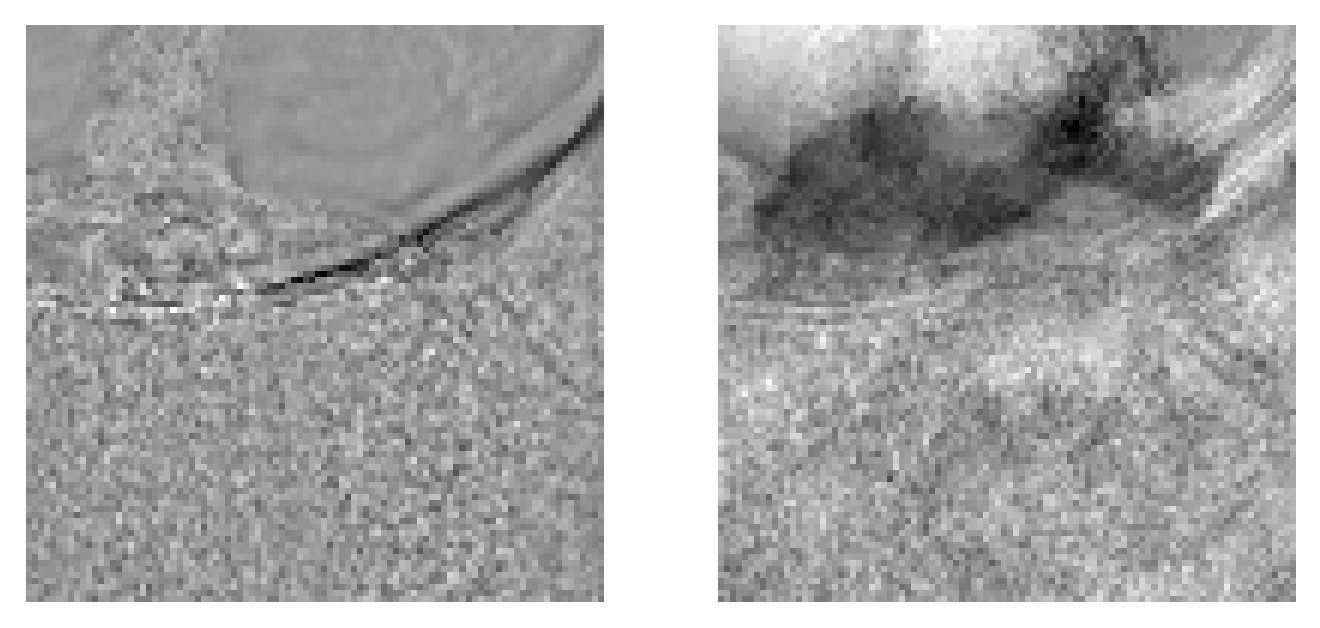

In [64]:
for N in range(len(check_data["hpf"])):
    print(check_data['hpf'].shape)
    hpf = check_data['hpf'][N][0]
    raw = check_data['raw'][N][0]

    print(f"이미지 형태: {hpf.shape}")
    print(f"이미지 형태: {raw.shape}")
    
    plt.figure(dpi=256)
    plt.subplot(121)
    plt.imshow(torch.sum(hpf,axis=2),cmap='gray')
    # plt.imshow(pre[:,:,16],cmap='jet')
    plt.axis('off')
    # plt.imshow(seg[:,:,16],cmap='jet')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(torch.sum(raw,axis=2),cmap='gray')
    # plt.imshow(seg[:,:,16],cmap='jet')
    plt.axis('off')
    plt.show()
    
    # rotated_hpf = np.rot90(hpf, k=-1)
    # rotated_raw = np.rot90(raw, k=-1)

    # # 플로팅을 위해 데이터를 (높이, 너비) 형태로 변환
    # rotated_hpf = rotated_hpf.squeeze()  # 단일 차원을 제거하여 형태를 변환
    # rotated_raw = rotated_raw.squeeze()  # 단일 차원을 제거하여 형태를 변환

    # plt.figure(dpi=256)
    # plt.subplot(121)
    # plt.imshow(rotated_hpf[:, :, 16], cmap='gray')
    # plt.axis('off')
    # plt.subplot(122)
    # plt.imshow(rotated_raw[:, :, 16], cmap='gray')
    # plt.axis('off')
    # plt.show()


In [78]:
train_ds = CacheDataset(
    data=train_data[:1],
    transform=train_transforms,
)
train_loader = DataLoader(
    train_ds, batch_size=1, shuffle=True,
)

Loading dataset: 100%|████████████████████████████| 1/1 [00:00<00:00,  2.88it/s]


In [79]:
val_ds = CacheDataset(
    data=train_data[:1],
    transform=val_transforms,
)

valid_loader = DataLoader(
    val_ds, batch_size=1, shuffle=True, 
)

Loading dataset: 100%|████████████████████████████| 1/1 [00:00<00:00,  2.88it/s]


In [67]:
# import torch
# import torch.nn as nn
# import monai

# device = "cuda:0"
# model = monai.networks.nets.UNet(
#     spatial_dims=3,
#     in_channels=1,
#     out_channels=1,
#     channels=(48, 48, 48, 48, 48),
#     strides=(1, 1, 1, 1),
# ).to(device)

# # Print the modified model
# print(model)


In [80]:
import torch
import torch.nn as nn
import monai

device = "cuda:0"
model = monai.networks.nets.BasicUNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=1,
    features=(32,64,128,256,512,32),
).to(device)

print(model)

BasicUNet features: (32, 64, 128, 256, 512, 32).
BasicUNet(
  (conv_0): TwoConv(
    (conv_0): Convolution(
      (conv): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (adn): ADN(
        (N): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (D): Dropout(p=0.0, inplace=False)
        (A): LeakyReLU(negative_slope=0.1, inplace=True)
      )
    )
    (conv_1): Convolution(
      (conv): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (adn): ADN(
        (N): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (D): Dropout(p=0.0, inplace=False)
        (A): LeakyReLU(negative_slope=0.1, inplace=True)
      )
    )
  )
  (down_1): Down(
    (max_pooling): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (convs): TwoConv(
      (conv_0): Convolution(
        (conv): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1

In [81]:
loss_function = nn.MSELoss()

torch.backends.cudnn.benchmark = True

In [82]:
def validation(epoch_iterator_val):
    model.eval()
    mse_vals = list()
    with torch.no_grad():
        for step, batch in enumerate(epoch_iterator_val):
            x = batch["hpf"].to(device) 
            y = batch["raw"].to(device)
            # x = x.permute(0,3,1,2)
            # y = y.permute(0,3,1,2)
            
            val_inputs, val_labels = (x, y)
            val_outputs = model(val_inputs)
            
            # val_single_label = (val_labels == 3).to(val_labels.dtype)
                      
            if step==0:
                plt.figure(dpi=256)
                plt.subplot(161)
                plt.imshow(torch.rot90(torch.sum(val_inputs[0,0,:,:,:].detach().cpu(), dim=2)), cmap='gray')
                plt.axis('off')
                plt.title('Input')
                plt.subplot(162)
                plt.imshow(torch.rot90(torch.sum(val_labels[0,0,:,:,:].detach().cpu(), dim=2)), cmap='gray')
                plt.axis('off')
                plt.title('Label')
                plt.subplot(163)
                plt.imshow(torch.rot90(torch.sum(val_outputs[0,0,:,:,:].detach().cpu(), dim=2)), cmap='gray')
                plt.axis('off')
                plt.title('Output')
                plt.show()
            
            mse_loss = loss_function(val_outputs, val_labels)
            mse_vals.append(mse_loss.item())
            epoch_iterator_val.set_description(
                "Validate (%d / %d Steps) (mse=%2.5f)" % (global_step, 10.0, mse_loss.item())
            )
                  
    mean_mse_val = np.mean(mse_vals)
    return mean_mse_val

In [83]:
def train(global_step, train_loader, mse_val_best, global_step_best):
    model.train()
    epoch_loss = 0
    step = 0
    epoch_iterator = tqdm(
        train_loader, desc="Training (X / X Steps) (loss=X.X)", dynamic_ncols=True
    )
    for step, batch in enumerate(epoch_iterator):
        step += 1
        x = batch["hpf"].to(device)
        y = batch["raw"].to(device)
        # x = batch["hpf"].squeeze(0).to(device) 
        # y = batch["raw"].squeeze(0).to(device)
        # print(x.shape)
        # x = x.permute(0,3,1,2)
        # print(x.shape)
        # print(y.shape)
        # y = y.permute(0,3,1,2)
        # print(y.shape)
        
        logit_map = model(x)
        loss = loss_function(logit_map, y)
        loss.backward()
        epoch_loss += loss.item()
        loss_values.append(loss.item())  # 전체 loss 보기위해 새로 추가
        optimizer.step()
        optimizer.zero_grad()
        epoch_iterator.set_description(
            "Training (%d / %d Steps) (loss=%2.5f)" % (global_step, max_iterations, loss)
        )

        # Validation
        if (
            global_step % eval_num == 0 and global_step != 0
        ) or global_step == max_iterations:
            epoch_iterator_val = tqdm(
                valid_loader, desc="Validate (X / X Steps) (mse=X.X)", dynamic_ncols=True
            )
            mse_val = validation(epoch_iterator_val)  # 변경된 함수 사용
            epoch_loss /= step
            epoch_loss_values.append(epoch_loss)
            metric_values.append(mse_val)
            # Check if it's the best mse_val
            if mse_val < mse_val_best:
                mse_val_best = mse_val
                global_step_best = global_step
                torch.save(
                    model.state_dict(), os.path.join(f"HPF_RAW_model_best_vxxxx_{global_step}.pth")
                )
                print(
                    "Model Was Saved! Current Best Avg. MSE: {} Current Avg. MSE: {}".format(
                        mse_val_best, mse_val
                    )
                )
            else:
                print(
                    "Model Was Not Saved! Current Best Avg. MSE: {} Current Avg. MSE: {}".format(
                        mse_val_best, mse_val
                    )
                )
        global_step += 1
    return global_step, mse_val_best, global_step_best


In [93]:
max_iterations = 3000
eval_num = 300
global_step = 0
mse_val_best = 40.0  # 최소값으로 초기화
global_step_best = 0
epoch_loss_values = []
metric_values = []
loss_values = [] # 새로 추가해줌 (전체 loss 보려고)
#optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [94]:
model.load_state_dict(torch.load("HPF_RAW_model_last_vxxxx_8000.pth"))

<All keys matched successfully>

Training (99 / 3000 Steps) (loss=73.72829): 100%|█| 1/1 [00:00<00:00,  3.66it/s]
Training (100 / 3000 Steps) (loss=58.70141): 100%|█| 1/1 [00:00<00:00,  3.43it/s
Training (101 / 3000 Steps) (loss=64.60188): 100%|█| 1/1 [00:00<00:00,  3.87it/s
Training (102 / 3000 Steps) (loss=80.08518): 100%|█| 1/1 [00:00<00:00,  3.43it/s
Training (103 / 3000 Steps) (loss=49.22448): 100%|█| 1/1 [00:00<00:00,  3.84it/s
Training (104 / 3000 Steps) (loss=75.78568): 100%|█| 1/1 [00:00<00:00,  3.44it/s
Training (105 / 3000 Steps) (loss=65.00787): 100%|█| 1/1 [00:00<00:00,  3.85it/s
Training (106 / 3000 Steps) (loss=74.93975): 100%|█| 1/1 [00:00<00:00,  3.87it/s
Training (107 / 3000 Steps) (loss=59.22517): 100%|█| 1/1 [00:00<00:00,  6.40it/s
Training (108 / 3000 Steps) (loss=65.15890): 100%|█| 1/1 [00:00<00:00,  3.48it/s
Training (109 / 3000 Steps) (loss=80.72384): 100%|█| 1/1 [00:00<00:00,  3.88it/s
Training (110 / 3000 Steps) (loss=78.85405): 100%|█| 1/1 [00:00<00:00,  3.45it/s
Training (111 / 3000 Steps) 

Training (202 / 3000 Steps) (loss=62.31568): 100%|█| 1/1 [00:00<00:00,  6.43it/s
Training (203 / 3000 Steps) (loss=54.34470): 100%|█| 1/1 [00:00<00:00,  6.33it/s
Training (204 / 3000 Steps) (loss=72.27185): 100%|█| 1/1 [00:00<00:00,  3.42it/s
Training (205 / 3000 Steps) (loss=71.09581): 100%|█| 1/1 [00:00<00:00,  6.36it/s
Training (206 / 3000 Steps) (loss=61.82098): 100%|█| 1/1 [00:00<00:00,  3.86it/s
Training (207 / 3000 Steps) (loss=84.20699): 100%|█| 1/1 [00:00<00:00,  5.79it/s
Training (208 / 3000 Steps) (loss=78.91019): 100%|█| 1/1 [00:00<00:00,  3.83it/s
Training (209 / 3000 Steps) (loss=74.01505): 100%|█| 1/1 [00:00<00:00,  3.84it/s
Training (210 / 3000 Steps) (loss=63.78621): 100%|█| 1/1 [00:00<00:00,  3.45it/s
Training (211 / 3000 Steps) (loss=74.66559): 100%|█| 1/1 [00:00<00:00,  3.83it/s
Training (212 / 3000 Steps) (loss=56.07485): 100%|█| 1/1 [00:00<00:00,  6.38it/s
Training (213 / 3000 Steps) (loss=81.91419): 100%|█| 1/1 [00:00<00:00,  3.41it/s
Training (214 / 3000 Steps) 

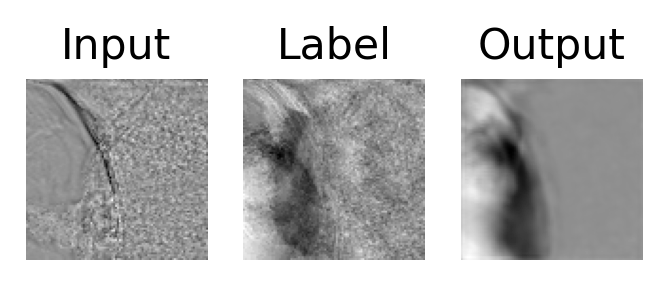


Validate (300 / 10 Steps) (mse=82.97112): 100%|███| 1/1 [00:00<00:00,  6.07it/s]
Training (300 / 3000 Steps) (loss=68.59281): 100%|█| 1/1 [00:00<00:00,  2.06it/s


Model Was Not Saved! Current Best Avg. MSE: 40.0 Current Avg. MSE: 82.97111511230469


Training (301 / 3000 Steps) (loss=66.79433): 100%|█| 1/1 [00:00<00:00,  3.85it/s
Training (302 / 3000 Steps) (loss=67.35509): 100%|█| 1/1 [00:00<00:00,  6.38it/s
Training (303 / 3000 Steps) (loss=46.00996): 100%|█| 1/1 [00:00<00:00,  3.85it/s
Training (304 / 3000 Steps) (loss=60.94471): 100%|█| 1/1 [00:00<00:00,  6.31it/s
Training (305 / 3000 Steps) (loss=79.68255): 100%|█| 1/1 [00:00<00:00,  6.32it/s
Training (306 / 3000 Steps) (loss=76.24044): 100%|█| 1/1 [00:00<00:00,  3.42it/s
Training (307 / 3000 Steps) (loss=52.03872): 100%|█| 1/1 [00:00<00:00,  3.80it/s
Training (308 / 3000 Steps) (loss=84.99600): 100%|█| 1/1 [00:00<00:00,  5.30it/s
Training (309 / 3000 Steps) (loss=90.34314): 100%|█| 1/1 [00:00<00:00,  6.37it/s
Training (310 / 3000 Steps) (loss=75.68673): 100%|█| 1/1 [00:00<00:00,  3.87it/s
Training (311 / 3000 Steps) (loss=63.77499): 100%|█| 1/1 [00:00<00:00,  6.34it/s
Training (312 / 3000 Steps) (loss=81.21420): 100%|█| 1/1 [00:00<00:00,  3.79it/s
Training (313 / 3000 Steps) 

Training (503 / 3000 Steps) (loss=66.64005): 100%|█| 1/1 [00:00<00:00,  5.02it/s
Training (504 / 3000 Steps) (loss=68.26914): 100%|█| 1/1 [00:00<00:00,  3.81it/s
Training (505 / 3000 Steps) (loss=64.37146): 100%|█| 1/1 [00:00<00:00,  3.55it/s
Training (506 / 3000 Steps) (loss=83.58945): 100%|█| 1/1 [00:00<00:00,  3.82it/s
Training (507 / 3000 Steps) (loss=55.76302): 100%|█| 1/1 [00:00<00:00,  3.43it/s
Training (508 / 3000 Steps) (loss=77.88165): 100%|█| 1/1 [00:00<00:00,  3.82it/s
Training (509 / 3000 Steps) (loss=81.15304): 100%|█| 1/1 [00:00<00:00,  3.40it/s
Training (510 / 3000 Steps) (loss=90.04813): 100%|█| 1/1 [00:00<00:00,  3.82it/s
Training (511 / 3000 Steps) (loss=64.59469): 100%|█| 1/1 [00:00<00:00,  5.08it/s
Training (512 / 3000 Steps) (loss=88.82291): 100%|█| 1/1 [00:00<00:00,  6.26it/s
Training (513 / 3000 Steps) (loss=65.76125): 100%|█| 1/1 [00:00<00:00,  3.83it/s
Training (514 / 3000 Steps) (loss=77.70352): 100%|█| 1/1 [00:00<00:00,  6.26it/s
Training (515 / 3000 Steps) 

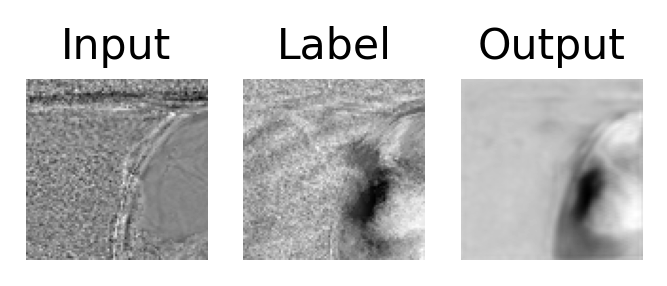


Validate (600 / 10 Steps) (mse=82.97285): 100%|███| 1/1 [00:00<00:00,  2.83it/s]
Training (600 / 3000 Steps) (loss=68.49972): 100%|█| 1/1 [00:00<00:00,  1.62it/s


Model Was Not Saved! Current Best Avg. MSE: 40.0 Current Avg. MSE: 82.97284698486328


Training (601 / 3000 Steps) (loss=65.67695): 100%|█| 1/1 [00:00<00:00,  3.79it/s
Training (602 / 3000 Steps) (loss=60.06359): 100%|█| 1/1 [00:00<00:00,  3.43it/s
Training (603 / 3000 Steps) (loss=49.68583): 100%|█| 1/1 [00:00<00:00,  5.10it/s
Training (604 / 3000 Steps) (loss=63.90046): 100%|█| 1/1 [00:00<00:00,  3.87it/s
Training (605 / 3000 Steps) (loss=48.59923): 100%|█| 1/1 [00:00<00:00,  6.29it/s
Training (606 / 3000 Steps) (loss=65.76735): 100%|█| 1/1 [00:00<00:00,  5.13it/s
Training (607 / 3000 Steps) (loss=75.50969): 100%|█| 1/1 [00:00<00:00,  6.26it/s
Training (608 / 3000 Steps) (loss=80.60075): 100%|█| 1/1 [00:00<00:00,  3.86it/s
Training (609 / 3000 Steps) (loss=71.39243): 100%|█| 1/1 [00:00<00:00,  6.20it/s
Training (610 / 3000 Steps) (loss=71.73218): 100%|█| 1/1 [00:00<00:00,  3.87it/s
Training (611 / 3000 Steps) (loss=87.82032): 100%|█| 1/1 [00:00<00:00,  5.24it/s
Training (612 / 3000 Steps) (loss=71.57504): 100%|█| 1/1 [00:00<00:00,  6.18it/s
Training (613 / 3000 Steps) 

Training (803 / 3000 Steps) (loss=58.39772): 100%|█| 1/1 [00:00<00:00,  6.26it/s
Training (804 / 3000 Steps) (loss=65.21915): 100%|█| 1/1 [00:00<00:00,  6.19it/s
Training (805 / 3000 Steps) (loss=65.53336): 100%|█| 1/1 [00:00<00:00,  6.26it/s
Training (806 / 3000 Steps) (loss=63.67015): 100%|█| 1/1 [00:00<00:00,  5.25it/s
Training (807 / 3000 Steps) (loss=64.74483): 100%|█| 1/1 [00:00<00:00,  6.30it/s
Training (808 / 3000 Steps) (loss=84.15177): 100%|█| 1/1 [00:00<00:00,  3.89it/s
Training (809 / 3000 Steps) (loss=42.95250): 100%|█| 1/1 [00:00<00:00,  3.43it/s
Training (810 / 3000 Steps) (loss=70.17023): 100%|█| 1/1 [00:00<00:00,  3.82it/s
Training (811 / 3000 Steps) (loss=71.22037): 100%|█| 1/1 [00:00<00:00,  3.46it/s
Training (812 / 3000 Steps) (loss=73.93156): 100%|█| 1/1 [00:00<00:00,  3.57it/s
Training (813 / 3000 Steps) (loss=68.93261): 100%|█| 1/1 [00:00<00:00,  5.07it/s
Training (814 / 3000 Steps) (loss=59.15687): 100%|█| 1/1 [00:00<00:00,  3.90it/s
Training (815 / 3000 Steps) 

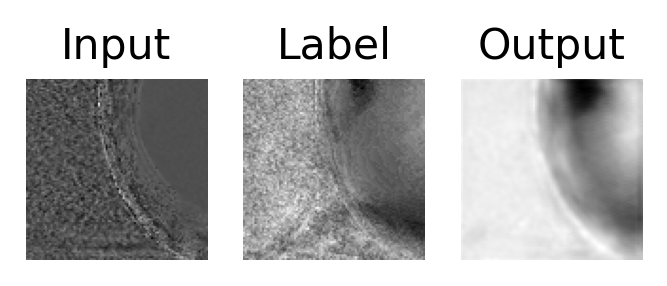


Validate (900 / 10 Steps) (mse=62.34759): 100%|███| 1/1 [00:00<00:00,  4.80it/s]
Training (900 / 3000 Steps) (loss=57.37286): 100%|█| 1/1 [00:00<00:00,  2.70it/s


Model Was Not Saved! Current Best Avg. MSE: 40.0 Current Avg. MSE: 62.34758758544922


Training (901 / 3000 Steps) (loss=73.50642): 100%|█| 1/1 [00:00<00:00,  6.19it/s
Training (902 / 3000 Steps) (loss=34.21593): 100%|█| 1/1 [00:00<00:00,  3.86it/s
Training (903 / 3000 Steps) (loss=55.57491): 100%|█| 1/1 [00:00<00:00,  6.17it/s
Training (904 / 3000 Steps) (loss=57.84289): 100%|█| 1/1 [00:00<00:00,  3.11it/s
Training (905 / 3000 Steps) (loss=59.29522): 100%|█| 1/1 [00:00<00:00,  6.21it/s
Training (906 / 3000 Steps) (loss=61.38654): 100%|█| 1/1 [00:00<00:00,  6.24it/s
Training (907 / 3000 Steps) (loss=68.89967): 100%|█| 1/1 [00:00<00:00,  3.41it/s
Training (908 / 3000 Steps) (loss=62.79846): 100%|█| 1/1 [00:00<00:00,  3.82it/s
Training (909 / 3000 Steps) (loss=74.39800): 100%|█| 1/1 [00:00<00:00,  6.26it/s
Training (910 / 3000 Steps) (loss=87.85346): 100%|█| 1/1 [00:00<00:00,  5.51it/s
Training (911 / 3000 Steps) (loss=45.63363): 100%|█| 1/1 [00:00<00:00,  3.88it/s
Training (912 / 3000 Steps) (loss=84.43678): 100%|█| 1/1 [00:00<00:00,  6.05it/s
Training (913 / 3000 Steps) 

Training (1103 / 3000 Steps) (loss=79.34167): 100%|█| 1/1 [00:00<00:00,  3.85it/
Training (1104 / 3000 Steps) (loss=77.87479): 100%|█| 1/1 [00:00<00:00,  3.84it/
Training (1105 / 3000 Steps) (loss=80.71400): 100%|█| 1/1 [00:00<00:00,  3.86it/
Training (1106 / 3000 Steps) (loss=65.89687): 100%|█| 1/1 [00:00<00:00,  3.48it/
Training (1107 / 3000 Steps) (loss=85.57427): 100%|█| 1/1 [00:00<00:00,  6.21it/
Training (1108 / 3000 Steps) (loss=66.92061): 100%|█| 1/1 [00:00<00:00,  6.15it/
Training (1109 / 3000 Steps) (loss=80.02013): 100%|█| 1/1 [00:00<00:00,  3.54it/
Training (1110 / 3000 Steps) (loss=82.63192): 100%|█| 1/1 [00:00<00:00,  6.21it/
Training (1111 / 3000 Steps) (loss=80.75316): 100%|█| 1/1 [00:00<00:00,  6.28it/
Training (1112 / 3000 Steps) (loss=31.37047): 100%|█| 1/1 [00:00<00:00,  3.54it/
Training (1113 / 3000 Steps) (loss=41.24437): 100%|█| 1/1 [00:00<00:00,  3.84it/
Training (1114 / 3000 Steps) (loss=53.46510): 100%|█| 1/1 [00:00<00:00,  5.76it/
Training (1115 / 3000 Steps)

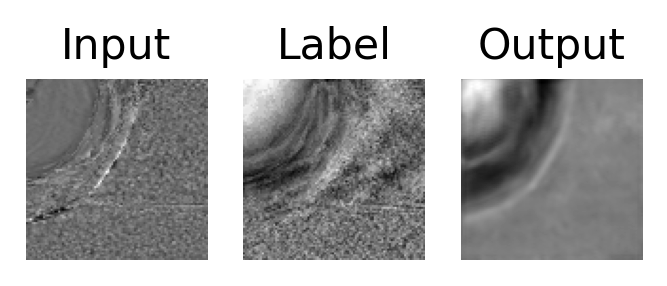


Validate (1200 / 10 Steps) (mse=77.71761): 100%|██| 1/1 [00:00<00:00,  6.03it/s]
Training (1200 / 3000 Steps) (loss=86.53483): 100%|█| 1/1 [00:00<00:00,  3.05it/


Model Was Not Saved! Current Best Avg. MSE: 40.0 Current Avg. MSE: 77.71761322021484


Training (1201 / 3000 Steps) (loss=40.40842): 100%|█| 1/1 [00:00<00:00,  6.15it/
Training (1202 / 3000 Steps) (loss=68.38656): 100%|█| 1/1 [00:00<00:00,  6.27it/
Training (1203 / 3000 Steps) (loss=75.74062): 100%|█| 1/1 [00:00<00:00,  6.27it/
Training (1204 / 3000 Steps) (loss=72.02989): 100%|█| 1/1 [00:00<00:00,  5.17it/
Training (1205 / 3000 Steps) (loss=80.02674): 100%|█| 1/1 [00:00<00:00,  3.86it/
Training (1206 / 3000 Steps) (loss=80.35591): 100%|█| 1/1 [00:00<00:00,  3.87it/
Training (1207 / 3000 Steps) (loss=71.11662): 100%|█| 1/1 [00:00<00:00,  3.86it/
Training (1208 / 3000 Steps) (loss=76.75351): 100%|█| 1/1 [00:00<00:00,  3.07it/
Training (1209 / 3000 Steps) (loss=71.30860): 100%|█| 1/1 [00:00<00:00,  6.25it/
Training (1210 / 3000 Steps) (loss=59.18308): 100%|█| 1/1 [00:00<00:00,  6.18it/
Training (1211 / 3000 Steps) (loss=85.35868): 100%|█| 1/1 [00:00<00:00,  3.85it/
Training (1212 / 3000 Steps) (loss=83.35246): 100%|█| 1/1 [00:00<00:00,  6.04it/
Training (1213 / 3000 Steps)

Training (1403 / 3000 Steps) (loss=82.41328): 100%|█| 1/1 [00:00<00:00,  3.87it/
Training (1404 / 3000 Steps) (loss=63.84139): 100%|█| 1/1 [00:00<00:00,  6.30it/
Training (1405 / 3000 Steps) (loss=69.64904): 100%|█| 1/1 [00:00<00:00,  5.19it/
Training (1406 / 3000 Steps) (loss=59.65087): 100%|█| 1/1 [00:00<00:00,  6.18it/
Training (1407 / 3000 Steps) (loss=62.18665): 100%|█| 1/1 [00:00<00:00,  6.17it/
Training (1408 / 3000 Steps) (loss=59.24428): 100%|█| 1/1 [00:00<00:00,  3.85it/
Training (1409 / 3000 Steps) (loss=57.38885): 100%|█| 1/1 [00:00<00:00,  6.17it/
Training (1410 / 3000 Steps) (loss=63.58991): 100%|█| 1/1 [00:00<00:00,  5.01it/
Training (1411 / 3000 Steps) (loss=67.12975): 100%|█| 1/1 [00:00<00:00,  6.25it/
Training (1412 / 3000 Steps) (loss=62.48667): 100%|█| 1/1 [00:00<00:00,  3.87it/
Training (1413 / 3000 Steps) (loss=69.46300): 100%|█| 1/1 [00:00<00:00,  3.41it/
Training (1414 / 3000 Steps) (loss=52.54877): 100%|█| 1/1 [00:00<00:00,  6.14it/
Training (1415 / 3000 Steps)

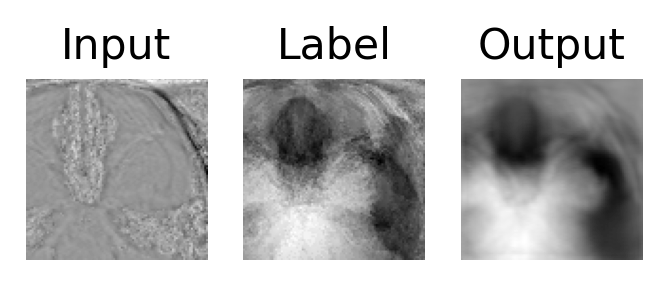


Validate (1500 / 10 Steps) (mse=61.51824): 100%|██| 1/1 [00:00<00:00,  4.65it/s]
Training (1500 / 3000 Steps) (loss=73.26228): 100%|█| 1/1 [00:00<00:00,  2.64it/


Model Was Not Saved! Current Best Avg. MSE: 40.0 Current Avg. MSE: 61.51823806762695


Training (1501 / 3000 Steps) (loss=56.26080): 100%|█| 1/1 [00:00<00:00,  6.18it/
Training (1502 / 3000 Steps) (loss=78.86777): 100%|█| 1/1 [00:00<00:00,  6.28it/
Training (1503 / 3000 Steps) (loss=45.63436): 100%|█| 1/1 [00:00<00:00,  3.81it/
Training (1504 / 3000 Steps) (loss=72.38931): 100%|█| 1/1 [00:00<00:00,  3.83it/
Training (1505 / 3000 Steps) (loss=74.34538): 100%|█| 1/1 [00:00<00:00,  6.20it/
Training (1506 / 3000 Steps) (loss=75.14457): 100%|█| 1/1 [00:00<00:00,  6.26it/
Training (1507 / 3000 Steps) (loss=44.75793): 100%|█| 1/1 [00:00<00:00,  3.86it/
Training (1508 / 3000 Steps) (loss=79.52148): 100%|█| 1/1 [00:00<00:00,  5.01it/
Training (1509 / 3000 Steps) (loss=78.13764): 100%|█| 1/1 [00:00<00:00,  6.30it/
Training (1510 / 3000 Steps) (loss=52.01232): 100%|█| 1/1 [00:00<00:00,  3.87it/
Training (1511 / 3000 Steps) (loss=73.07672): 100%|█| 1/1 [00:00<00:00,  3.88it/
Training (1512 / 3000 Steps) (loss=73.78318): 100%|█| 1/1 [00:00<00:00,  4.93it/
Training (1513 / 3000 Steps)

Training (1703 / 3000 Steps) (loss=81.21359): 100%|█| 1/1 [00:00<00:00,  6.22it/
Training (1704 / 3000 Steps) (loss=81.17867): 100%|█| 1/1 [00:00<00:00,  6.21it/
Training (1705 / 3000 Steps) (loss=56.52700): 100%|█| 1/1 [00:00<00:00,  6.20it/
Training (1706 / 3000 Steps) (loss=70.95595): 100%|█| 1/1 [00:00<00:00,  6.26it/
Training (1707 / 3000 Steps) (loss=42.40284): 100%|█| 1/1 [00:00<00:00,  3.42it/
Training (1708 / 3000 Steps) (loss=54.35323): 100%|█| 1/1 [00:00<00:00,  3.79it/
Training (1709 / 3000 Steps) (loss=76.26897): 100%|█| 1/1 [00:00<00:00,  3.81it/
Training (1710 / 3000 Steps) (loss=83.74861): 100%|█| 1/1 [00:00<00:00,  3.83it/
Training (1711 / 3000 Steps) (loss=50.20438): 100%|█| 1/1 [00:00<00:00,  3.80it/
Training (1712 / 3000 Steps) (loss=70.01067): 100%|█| 1/1 [00:00<00:00,  3.79it/
Training (1713 / 3000 Steps) (loss=79.61436): 100%|█| 1/1 [00:00<00:00,  3.41it/
Training (1714 / 3000 Steps) (loss=76.38931): 100%|█| 1/1 [00:00<00:00,  6.14it/
Training (1715 / 3000 Steps)

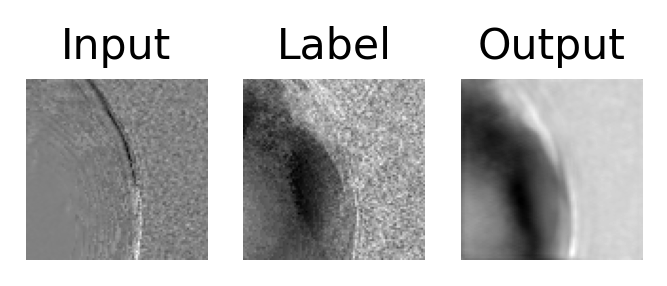


Validate (1800 / 10 Steps) (mse=61.94067): 100%|██| 1/1 [00:00<00:00,  4.93it/s]
Training (1800 / 3000 Steps) (loss=75.08963): 100%|█| 1/1 [00:00<00:00,  2.14it/


Model Was Not Saved! Current Best Avg. MSE: 40.0 Current Avg. MSE: 61.940673828125


Training (1801 / 3000 Steps) (loss=62.42490): 100%|█| 1/1 [00:00<00:00,  6.15it/
Training (1802 / 3000 Steps) (loss=45.44930): 100%|█| 1/1 [00:00<00:00,  3.79it/
Training (1803 / 3000 Steps) (loss=53.05470): 100%|█| 1/1 [00:00<00:00,  6.27it/
Training (1804 / 3000 Steps) (loss=38.46050): 100%|█| 1/1 [00:00<00:00,  3.80it/
Training (1805 / 3000 Steps) (loss=76.18286): 100%|█| 1/1 [00:00<00:00,  3.37it/
Training (1806 / 3000 Steps) (loss=49.01640): 100%|█| 1/1 [00:00<00:00,  3.79it/
Training (1807 / 3000 Steps) (loss=59.59896): 100%|█| 1/1 [00:00<00:00,  5.03it/
Training (1808 / 3000 Steps) (loss=55.80828): 100%|█| 1/1 [00:00<00:00,  6.17it/
Training (1809 / 3000 Steps) (loss=66.24882): 100%|█| 1/1 [00:00<00:00,  3.80it/
Training (1810 / 3000 Steps) (loss=87.44170): 100%|█| 1/1 [00:00<00:00,  6.27it/
Training (1811 / 3000 Steps) (loss=62.82647): 100%|█| 1/1 [00:00<00:00,  3.37it/
Training (1812 / 3000 Steps) (loss=84.33958): 100%|█| 1/1 [00:00<00:00,  3.80it/
Training (1813 / 3000 Steps)

Training (2003 / 3000 Steps) (loss=68.97903): 100%|█| 1/1 [00:00<00:00,  3.78it/
Training (2004 / 3000 Steps) (loss=55.91287): 100%|█| 1/1 [00:00<00:00,  4.77it/
Training (2005 / 3000 Steps) (loss=66.88506): 100%|█| 1/1 [00:00<00:00,  3.80it/
Training (2006 / 3000 Steps) (loss=74.16192): 100%|█| 1/1 [00:00<00:00,  3.82it/
Training (2007 / 3000 Steps) (loss=73.92060): 100%|█| 1/1 [00:00<00:00,  3.80it/
Training (2008 / 3000 Steps) (loss=59.10192): 100%|█| 1/1 [00:00<00:00,  3.51it/
Training (2009 / 3000 Steps) (loss=72.92828): 100%|█| 1/1 [00:00<00:00,  3.78it/
Training (2010 / 3000 Steps) (loss=82.38796): 100%|█| 1/1 [00:00<00:00,  3.68it/
Training (2011 / 3000 Steps) (loss=76.67039): 100%|█| 1/1 [00:00<00:00,  5.15it/
Training (2012 / 3000 Steps) (loss=79.93926): 100%|█| 1/1 [00:00<00:00,  6.25it/
Training (2013 / 3000 Steps) (loss=74.58677): 100%|█| 1/1 [00:00<00:00,  3.82it/
Training (2014 / 3000 Steps) (loss=54.80442): 100%|█| 1/1 [00:00<00:00,  3.50it/
Training (2015 / 3000 Steps)

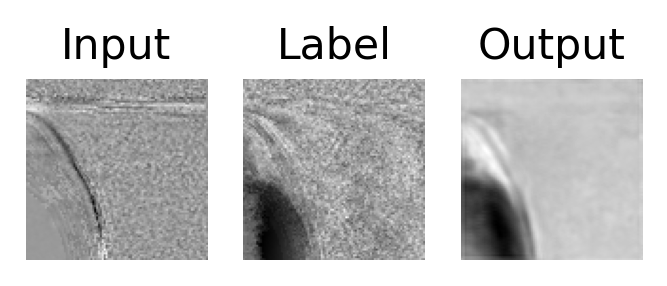


Validate (2100 / 10 Steps) (mse=80.29826): 100%|██| 1/1 [00:00<00:00,  6.00it/s]
Training (2100 / 3000 Steps) (loss=71.34818): 100%|█| 1/1 [00:00<00:00,  3.05it/


Model Was Not Saved! Current Best Avg. MSE: 40.0 Current Avg. MSE: 80.29825592041016


Training (2101 / 3000 Steps) (loss=77.44425): 100%|█| 1/1 [00:00<00:00,  3.76it/
Training (2102 / 3000 Steps) (loss=61.63536): 100%|█| 1/1 [00:00<00:00,  3.83it/
Training (2103 / 3000 Steps) (loss=54.61774): 100%|█| 1/1 [00:00<00:00,  3.40it/
Training (2104 / 3000 Steps) (loss=44.48771): 100%|█| 1/1 [00:00<00:00,  6.21it/
Training (2105 / 3000 Steps) (loss=65.80766): 100%|█| 1/1 [00:00<00:00,  6.25it/
Training (2106 / 3000 Steps) (loss=67.66029): 100%|█| 1/1 [00:00<00:00,  3.80it/
Training (2107 / 3000 Steps) (loss=50.71329): 100%|█| 1/1 [00:00<00:00,  4.80it/
Training (2108 / 3000 Steps) (loss=53.72642): 100%|█| 1/1 [00:00<00:00,  6.25it/
Training (2109 / 3000 Steps) (loss=80.92052): 100%|█| 1/1 [00:00<00:00,  3.83it/
Training (2110 / 3000 Steps) (loss=76.04787): 100%|█| 1/1 [00:00<00:00,  3.79it/
Training (2111 / 3000 Steps) (loss=81.05704): 100%|█| 1/1 [00:00<00:00,  3.81it/
Training (2112 / 3000 Steps) (loss=74.14898): 100%|█| 1/1 [00:00<00:00,  5.06it/
Training (2113 / 3000 Steps)

Training (2303 / 3000 Steps) (loss=76.94385): 100%|█| 1/1 [00:00<00:00,  3.43it/
Training (2304 / 3000 Steps) (loss=82.83698): 100%|█| 1/1 [00:00<00:00,  6.30it/
Training (2305 / 3000 Steps) (loss=67.92826): 100%|█| 1/1 [00:00<00:00,  6.23it/
Training (2306 / 3000 Steps) (loss=82.52746): 100%|█| 1/1 [00:00<00:00,  6.23it/
Training (2307 / 3000 Steps) (loss=64.44138): 100%|█| 1/1 [00:00<00:00,  5.21it/
Training (2308 / 3000 Steps) (loss=76.16451): 100%|█| 1/1 [00:00<00:00,  3.83it/
Training (2309 / 3000 Steps) (loss=56.61777): 100%|█| 1/1 [00:00<00:00,  3.37it/
Training (2310 / 3000 Steps) (loss=87.70607): 100%|█| 1/1 [00:00<00:00,  6.19it/
Training (2311 / 3000 Steps) (loss=62.42156): 100%|█| 1/1 [00:00<00:00,  6.26it/
Training (2312 / 3000 Steps) (loss=80.05816): 100%|█| 1/1 [00:00<00:00,  6.09it/
Training (2313 / 3000 Steps) (loss=73.41245): 100%|█| 1/1 [00:00<00:00,  6.12it/
Training (2314 / 3000 Steps) (loss=75.42109): 100%|█| 1/1 [00:00<00:00,  6.04it/
Training (2315 / 3000 Steps)

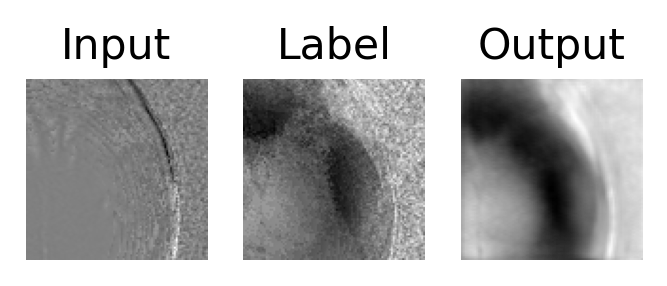


Validate (2400 / 10 Steps) (mse=50.89773): 100%|██| 1/1 [00:00<00:00,  5.93it/s]
Training (2400 / 3000 Steps) (loss=71.31586): 100%|█| 1/1 [00:00<00:00,  2.31it/


Model Was Not Saved! Current Best Avg. MSE: 40.0 Current Avg. MSE: 50.89773178100586


Training (2401 / 3000 Steps) (loss=69.50882): 100%|█| 1/1 [00:00<00:00,  3.76it/
Training (2402 / 3000 Steps) (loss=72.42300): 100%|█| 1/1 [00:00<00:00,  6.17it/
Training (2403 / 3000 Steps) (loss=58.00441): 100%|█| 1/1 [00:00<00:00,  6.18it/
Training (2404 / 3000 Steps) (loss=71.56119): 100%|█| 1/1 [00:00<00:00,  3.83it/
Training (2405 / 3000 Steps) (loss=77.96055): 100%|█| 1/1 [00:00<00:00,  3.79it/
Training (2406 / 3000 Steps) (loss=62.11075): 100%|█| 1/1 [00:00<00:00,  3.51it/
Training (2407 / 3000 Steps) (loss=69.07718): 100%|█| 1/1 [00:00<00:00,  3.80it/
Training (2408 / 3000 Steps) (loss=71.36400): 100%|█| 1/1 [00:00<00:00,  5.03it/
Training (2409 / 3000 Steps) (loss=74.42181): 100%|█| 1/1 [00:00<00:00,  3.79it/
Training (2410 / 3000 Steps) (loss=72.53459): 100%|█| 1/1 [00:00<00:00,  6.13it/
Training (2411 / 3000 Steps) (loss=60.88095): 100%|█| 1/1 [00:00<00:00,  3.82it/
Training (2412 / 3000 Steps) (loss=57.48185): 100%|█| 1/1 [00:00<00:00,  5.11it/
Training (2413 / 3000 Steps)

Training (2603 / 3000 Steps) (loss=73.54467): 100%|█| 1/1 [00:00<00:00,  3.82it/
Training (2604 / 3000 Steps) (loss=58.86983): 100%|█| 1/1 [00:00<00:00,  3.80it/
Training (2605 / 3000 Steps) (loss=71.84574): 100%|█| 1/1 [00:00<00:00,  6.09it/
Training (2606 / 3000 Steps) (loss=84.04215): 100%|█| 1/1 [00:00<00:00,  4.97it/
Training (2607 / 3000 Steps) (loss=79.30765): 100%|█| 1/1 [00:00<00:00,  3.80it/
Training (2608 / 3000 Steps) (loss=52.24448): 100%|█| 1/1 [00:00<00:00,  3.82it/
Training (2609 / 3000 Steps) (loss=79.68497): 100%|█| 1/1 [00:00<00:00,  3.77it/
Training (2610 / 3000 Steps) (loss=49.41787): 100%|█| 1/1 [00:00<00:00,  4.88it/
Training (2611 / 3000 Steps) (loss=73.99180): 100%|█| 1/1 [00:00<00:00,  6.17it/
Training (2612 / 3000 Steps) (loss=71.73460): 100%|█| 1/1 [00:00<00:00,  6.02it/
Training (2613 / 3000 Steps) (loss=80.72975): 100%|█| 1/1 [00:00<00:00,  6.19it/
Training (2614 / 3000 Steps) (loss=79.32690): 100%|█| 1/1 [00:00<00:00,  6.20it/
Training (2615 / 3000 Steps)

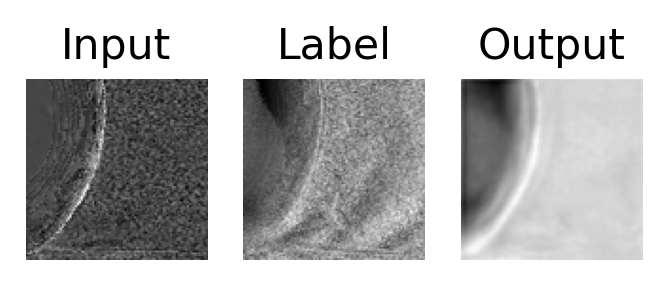


Validate (2700 / 10 Steps) (mse=74.10109): 100%|██| 1/1 [00:00<00:00,  5.83it/s]
Training (2700 / 3000 Steps) (loss=74.31033): 100%|█| 1/1 [00:00<00:00,  2.98it/


Model Was Not Saved! Current Best Avg. MSE: 40.0 Current Avg. MSE: 74.10108947753906


Training (2701 / 3000 Steps) (loss=62.89669): 100%|█| 1/1 [00:00<00:00,  6.12it/
Training (2702 / 3000 Steps) (loss=70.34238): 100%|█| 1/1 [00:00<00:00,  6.23it/
Training (2703 / 3000 Steps) (loss=78.54148): 100%|█| 1/1 [00:00<00:00,  6.23it/
Training (2704 / 3000 Steps) (loss=54.53971): 100%|█| 1/1 [00:00<00:00,  3.81it/
Training (2705 / 3000 Steps) (loss=79.20306): 100%|█| 1/1 [00:00<00:00,  6.30it/
Training (2706 / 3000 Steps) (loss=79.21502): 100%|█| 1/1 [00:00<00:00,  6.29it/
Training (2707 / 3000 Steps) (loss=56.18380): 100%|█| 1/1 [00:00<00:00,  5.21it/
Training (2708 / 3000 Steps) (loss=59.68092): 100%|█| 1/1 [00:00<00:00,  3.79it/
Training (2709 / 3000 Steps) (loss=68.10267): 100%|█| 1/1 [00:00<00:00,  3.82it/
Training (2710 / 3000 Steps) (loss=76.51913): 100%|█| 1/1 [00:00<00:00,  4.96it/
Training (2711 / 3000 Steps) (loss=60.90041): 100%|█| 1/1 [00:00<00:00,  3.80it/
Training (2712 / 3000 Steps) (loss=69.21813): 100%|█| 1/1 [00:00<00:00,  3.79it/
Training (2713 / 3000 Steps)

Training (2903 / 3000 Steps) (loss=54.63421): 100%|█| 1/1 [00:00<00:00,  3.38it/
Training (2904 / 3000 Steps) (loss=64.09741): 100%|█| 1/1 [00:00<00:00,  3.81it/
Training (2905 / 3000 Steps) (loss=56.73936): 100%|█| 1/1 [00:00<00:00,  4.94it/
Training (2906 / 3000 Steps) (loss=75.45326): 100%|█| 1/1 [00:00<00:00,  6.24it/
Training (2907 / 3000 Steps) (loss=79.44153): 100%|█| 1/1 [00:00<00:00,  6.25it/
Training (2908 / 3000 Steps) (loss=61.73613): 100%|█| 1/1 [00:00<00:00,  6.27it/
Training (2909 / 3000 Steps) (loss=56.40351): 100%|█| 1/1 [00:00<00:00,  6.16it/
Training (2910 / 3000 Steps) (loss=38.97252): 100%|█| 1/1 [00:00<00:00,  3.78it/
Training (2911 / 3000 Steps) (loss=63.82443): 100%|█| 1/1 [00:00<00:00,  6.12it/
Training (2912 / 3000 Steps) (loss=85.90661): 100%|█| 1/1 [00:00<00:00,  3.37it/
Training (2913 / 3000 Steps) (loss=60.59322): 100%|█| 1/1 [00:00<00:00,  6.16it/
Training (2914 / 3000 Steps) (loss=81.82635): 100%|█| 1/1 [00:00<00:00,  6.26it/
Training (2915 / 3000 Steps)

In [95]:
while global_step < max_iterations:
    global_step, mse_val_best, global_step_best = train(
        global_step, train_loader, mse_val_best, global_step_best
    )

torch.save(model.state_dict(), os.path.join( f"HPF_RAW_model_last_vxxxx_{global_step}.pth"))

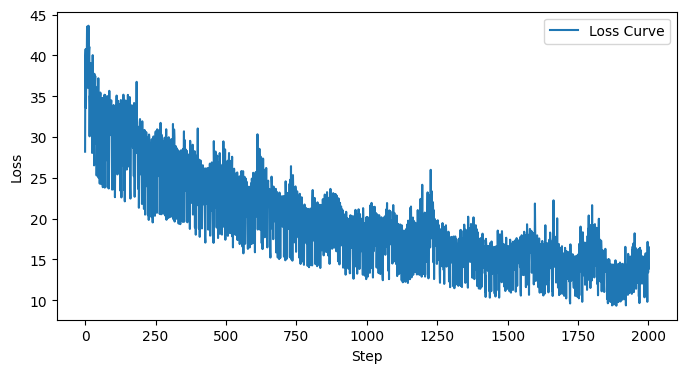

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(loss_values, label='Loss Curve')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('/home/oem/hufsbaby/joon/Brain(0731)/SingleSeg_SWI_loss_10000_var.png')
plt.show()

In [24]:
global_step

9024

In [ ]:
# input_RS = []
# for i in df_idx_list:
#     p = df.iloc[i,0]
#     if i in test_list:
#         input_RS.append(p)
        
# print(input_RS)

In [ ]:
# test_data = [
#     {
#         "image1": os.path.join(data_Root,str(idx)+'/'+
#                                     "SWI_M_r.nii.gz"),
#         "seg": os.path.join(data_Root,str(idx)+'/'+
#                                     "wmbg_cx.nii.gz"),            
#     }
#     for idx in input_RS
# ]

In [ ]:
# print(len(test_data))
# test_data

In [29]:
test_transforms = Compose([
    LoadImaged(keys=["hpf", "raw"]),
    EnsureChannelFirstd(keys=["hpf", "raw"]),
    
    # # Use SpatialCropd with roi_center
    # SpatialCropd(keys=["hpf", "raw"], roi_center=roi_center, roi_size=(96, 96, 32)),
    
    ToTensord(keys=["hpf", "raw"]),
])

Loading dataset: 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]


image shape: torch.Size([256, 256, 72])


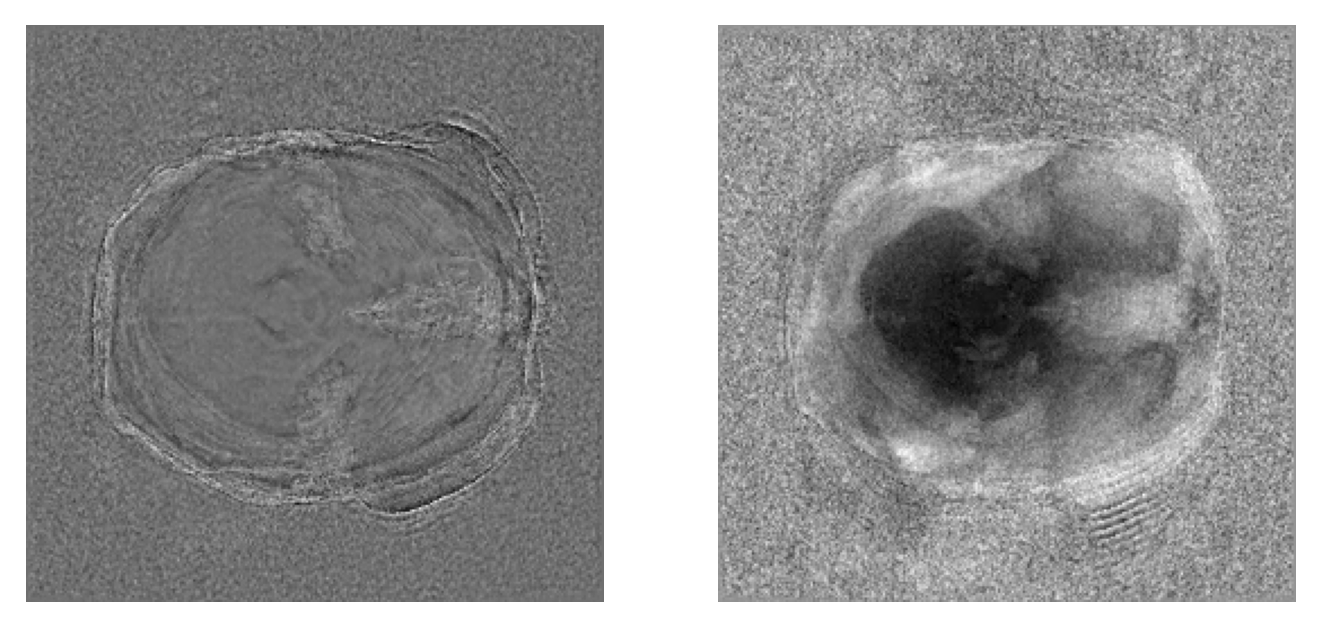

In [30]:
check_ds2 = CacheDataset(data=val_data, transform = test_transforms)
check_loader2 = DataLoader(check_ds2, batch_size=1, num_workers = 2)
check_data2 = first(check_loader2)

for N in range(len(check_data2["hpf"])):
    pre = (check_data2["hpf"][N][0])
    seg = (check_data2["raw"][N][0])

    print(f"image shape: {pre.shape}")
    plt.figure(dpi=256)
    plt.subplot(121)
    plt.imshow(torch.sum(pre,axis=2),cmap='gray')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(torch.sum(seg,axis=2),cmap='gray')
    plt.axis('off')
    plt.show()

In [39]:
test_ds = Dataset(
    data=train_data,
    transform=test_transforms,
)

In [40]:
test_loader = DataLoader(
    test_ds, batch_size=1, shuffle=False, 
)

In [33]:
from monai.inferers import sliding_window_inference
import nibabel as nib

In [27]:
# from collections import OrderedDict
# device = 'cuda:0'
# model = monai.networks.nets.SwinUNETR(img_size=(96,96,32), in_channels=1, out_channels=2, feature_size=48).to(device)
# loaded_state_dict = torch.load('/home/oem/hufsbaby/joon/Brain(0731)/SingleBrain_model_best_vxxxx_50000.pth')
# current_state_dict = model.state_dict()
# current_state_dict.update(loaded_state_dict)
# model.load_state_dict(current_state_dict)
# #model.load_state_dict('./SingleBrain_model_best_vxxxx.pth')

In [69]:
# model.eval()
# with torch.no_grad():
#     for idx, batch in enumerate(check_loader2):
#         test_inputs = batch['hpf'].to(device)
#         GT = batch['raw'].to(device)
#         test_outputs = sliding_window_inference(test_inputs, (96,96,32), 1, model, overlap=0.5,mode='gaussian').softmax(1)
#         # print(test_outputs.unique())
#         label_0 = (test_outputs[0,0].detach().cpu()>0.95).astype(int) * 0
#         label_1 = (test_outputs[0,1].detach().cpu()>0.95).astype(int) * 1
#         test_outputs = torch.tensor((label_0 + label_1)[np.newaxis, np.newaxis])
#         # print(type(test_outputs))
        
#         pid = batch["hpf_meta_dict"]['filename_or_obj'][0].split('/')[-1].split('_')[0]
#         # print(f"test_inputs shape : {test_inputs.shape}")
#         # print(f"GT(=label) shape : {GT.shape}")
#         # print(f"dl_outputs shape : {test_outputs.shape}")
        
#         plt.figure(dpi = 256)
#         plt.subplot(131)
#         plt.imshow(torch.rot90(test_inputs[0,0,:,160,:].detach().cpu()), cmap='gray')
#         plt.gca().set_title('image')
#         plt.axis('off')
#         plt.subplot(132)
#         plt.imshow(torch.rot90(GT[0,0,:,160,:].detach().cpu()), cmap='gray')
#         plt.gca().set_title('label')
#         plt.axis('off')
#         plt.subplot(133)
#         plt.imshow(torch.rot90(test_outputs[0,0,:,160,:].detach().cpu()), cmap='gray')
#         plt.gca().set_title('dl_output')
#         plt.axis('off')
#         plt.show()

    
        


(256, 256, 72)


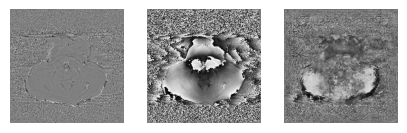

In [42]:
from monai.inferers import sliding_window_inference
from matplotlib.ticker import StrMethodFormatter

model.eval()
dice_test = list()
dice_scores = []

with torch.no_grad():
    for step, batch in enumerate(test_loader):
        test_inputs, test_seg = (batch["hpf"]).to(device), (batch['raw']).to(device)
        # # print(test_inputs.shape)
        # # print(test_seg.shape)
        test_outputs = sliding_window_inference(test_inputs, [96,96,32], 1, model, overlap=0.85,mode='gaussian')
        # # print(test_outputs.shape)
        # plt.subplot(131)
        # plt.imshow(torch.rot90(torch.sum(test_inputs[0,0,:,:,:].detach().cpu(),dim=2)),cmap='gray')
        # plt.title("input")
        # plt.axis('off')
        # plt.subplot(132)
        # plt.imshow(torch.rot90(torch.sum(test_seg[0,0,:,:,:].detach().cpu(),dim=2)),cmap='gray')
        # plt.title('label')
        # plt.axis('off')
        # plt.subplot(133)
        # plt.imshow(torch.rot90(torch.sum(test_outputs[0,0,:,:,:].detach().cpu(),dim=2)),cmap='gray')
        # plt.title('output')
        # plt.axis('off')
        
        # plt.show()
        
        z = 11


        input_data = test_inputs[0, 0].cpu().numpy()  # 첫 번째 batch의 input_data 추출
        label_data = test_seg[0, 0].cpu().numpy()  # 첫 번째 batch의 seg_data 추출
        output_data = test_outputs[0, 0].cpu().numpy()  # 첫 번째 batch seg_data 추출

        print(input_data.shape)

        input_slice = np.rot90(input_data[:, :, z])
        label_slice = np.rot90(label_data[:, :, z])
        output_slice = np.rot90(output_data[:, :, z])
        

        plt.figure(figsize=(5, 5))
        plt.subplot(131)
        plt.imshow(input_slice, cmap='gray')
        plt.axis('off')
        plt.subplot(132)
        plt.imshow(label_slice, cmap='gray')
        plt.axis('off')
        plt.subplot(133)
        plt.imshow(output_slice, cmap='gray')
        plt.axis('off')
        plt.show()
        
        break
    
        
        
        
        

        

In [ ]:
# SWI = test_inputs[0, 0, :, :, :].detach().cpu()
# SWI = SWI.numpy().astype(np.float32)  # Convert to numpy array and specify data type
# nifti_img = nib.Nifti1Image(SWI, affine=np.eye(4))
# nib.save(nifti_img, '/home/oem/hufsbaby/joon/Brain(0731)/Result/SWI_DICE.nii.gz')

In [ ]:
# BG = test_outputs[0, 1, :, :, :].detach().cpu()
# BG = BG.numpy().astype(np.float32)  # Convert to numpy array and specify data type
# nifti_img = nib.Nifti1Image(BG, affine=np.eye(4))
# nib.save(nifti_img, '/home/oem/hufsbaby/joon/Brain(0731)/Result/BG_SWI_DICE.nii.gz')

In [ ]:
# CSF = val_outputs[0, 2, :, :, :].detach().cpu()
# CSF = CSF.numpy().astype(np.float32)  # Convert to numpy array and specify data type
# nifti_img = nib.Nifti1Image(CSF, affine=np.eye(4))
# nib.save(nifti_img, '/home/oem/hufsbaby/joon/Brain(0731)/Result/CSF.nii.gz')

In [ ]:
# GM = val_outputs[0, 3, :, :, :].detach().cpu()
# GM = GM.numpy().astype(np.float32)  # Convert to numpy array and specify data type
# nifti_img = nib.Nifti1Image(GM, affine=np.eye(4))
# nib.save(nifti_img, '/home/oem/hufsbaby/joon/Brain(0731)/Result/GM.nii.gz')

In [ ]:
# argmax_indices = np.argmax(val_outputs, axis = 1)
# seg_mask = argmax_indices[0,:,:,:]
# seg_mask = seg_mask.astype(np.float32)
# nifti_img = nib.Nifti1Image(seg_mask, affine = np.eye(4))
# nib.save(nifti_img, '/home/oem/hufsbaby/joon/Brain(0731)/Result/seg_mask.nii.gz')